In [61]:
import lsst.sims.maf.metrics.baseMetric

In [11]:
import pickle

In [1]:
import numpy as np
import random
from lsst.sims.maf.metrics import BaseMetric, ExgalM5
from lsst.sims.maf.maps import DustMap
from lsst.sims.maf.slicers import HealpixSlicer
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.db as db
import lsst.sims.maf.metricBundles as metricBundles



In [2]:
import warnings
warnings.filterwarnings('ignore')
%pylab inline
from scipy import stats
from angles import r2d, r2arcs, d2arcs, arcs2r
def arcm2r(theta):
    return arcs2r(theta*60)
import seaborn as sns;sns.set_style('darkgrid')
import lsst.sims.maf.stackers as stackers
import treecorr as tr
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = 19,14
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
from collections import defaultdict
import lsst.sims.maf.maps as maps
import treecorr
from itertools import chain
sns.set_context('poster',font_scale=1.4)
import random
import lsst.sims.maf.batches as batches
from itertools import groupby
from weakLensingSystematicsMetricCopy1 import AverageVisitsMetric

Populating the interactive namespace from numpy and matplotlib


In [51]:
newestSimsPath = '/global/cscratch1/sd/awan/dbs_post_wp_v2/'
newestSims = !ls /global/cscratch1/sd/awan/dbs_post_wp_v2/
newestSims = [sim[:-3] for sim in newestSims]

In [64]:
d = {}
nside = 256
outDir = 'temp'
resultsDb = db.ResultsDb(outDir=outDir)

In [57]:
d = pickle.load(open('metricresults_newsims_year1.p', 'rb'))

In [ ]:
sqlWhere = 'filter = "i" and note not like "DD%"'
for i in newestSims:
    print(i)
    if i not in d.keys():
        print('starting')
        runName = newestSimsPath+i
        myBundles = {}
        try:
            opsdb = db.OpsimDatabase(runName+'.db')
        except Exception as e:
            print(e)
            continue
        slicer = slicers.HealpixSlicer(
            lonCol='fieldRA', latCol='fieldDec', nside=nside
            )
        dustMap = maps.DustMap(interp=False, nside=nside)
        metric = AverageVisitsMetric(depthlim=24.5, maps=['DustMap'])
        myBundles['metric'] = metricBundles.MetricBundle(
                                            metric,
                                            slicer,
                                            constraint=sqlWhere,
                                            runName=newestSimsPath+i,
                                            stackerList=[])

        bgroup = metricBundles.MetricBundleGroup(myBundles, opsdb,
                                                 outDir=outDir,
                                                 resultsDb=resultsDb)
        bgroup.runAll()
        mbund = myBundles['metric']
        d[i] = mbund.metricValues.data[np.logical_and(mbund.metricValues>0, mbund.metricValues.mask==False)]
        pickle.dump(d, open('metricresults_newsims_year10.p', 
                           'wb')
                   )

add_mag_clouds_v1.3_10yrs
starting
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Querying database SummaryAllProps with constraint filter = "i" and note not like "DD%" for columns ['fieldRA', 'fiveSigmaDepth', 'fieldId', 'fieldDec']
Found 428965 visits
Running:  ['metric']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
agnddf_illum10_v1.3_10yrs
starting
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Querying database SummaryAllProps with constraint filter = "i" and note not like "DD%" for columns ['fieldRA', 'fiveSigmaDepth', 'fieldId', 'fieldDec']
Found 451194 visits
Running:  ['metric']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
agnddf_illum15_v1.3_10yrs
starting
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Querying database SummaryAllProps with constraint filter = "i" and note not like "DD%" for column

In [20]:
d.keys()

dict_keys(['altroll_mod2_sdf_0.20_v1.3_10yrs', 'altwfd_v1.3_10yrs', 'baseline10yrs', 'baseline_1exp_nopairs_10yrs', 'baseline_1exp_pairsame_10yrs', 'baseline_1exp_pairsmix_10yrs', 'baseline_2exp_pairsame_10yrs', 'baseline_2exp_pairsmix_10yrs', 'big_sky_dust_v1.3_10yrs', 'big_sky_nouiy10yrs', 'bluer_footprint10yrs', 'ddf_0.23deg_1exp_pairsmix_10yrs', 'ddf_0.70deg_1exp_pairsmix_10yrs', 'ddf_pn_0.23deg_1exp_pairsmix_10yrs', 'ddf_pn_0.70deg_1exp_pairsmix_10yrs', 'dec_1exp_pairsmix_10yrs', 'desc_ddf_pn_0.70deg_1exp_pairsmix_10yrs', 'exptime_1exp_pairsmix_10yrs', 'fc1exp_pairsmix_ilim15_10yrs', 'fc1exp_pairsmix_ilim30_10yrs', 'fc1exp_pairsmix_ilim60_10yrs', 'gp_heavy10yrs', 'newA10yrs', 'newB10yrs', 'noddf_1exp_pairsame_10yrs', 'presto_10yrs', 'presto_third_10yrs', 'roll_mod2_sdf0.05mixed_10yrs', 'roll_mod2_sdf0.10mixed_10yrs', 'roll_mod2_sdf0.20mixed_10yrs', 'roll_mod3_sdf0.05mixed_10yrs', 'roll_mod3_sdf0.10mixed_10yrs', 'roll_mod3_sdf0.20mixed_10yrs', 'roll_mod6_sdf0.05mixed_10yrs', 'roll_

In [9]:
np.mean(d[newestSims[0]])

160.42013068483007

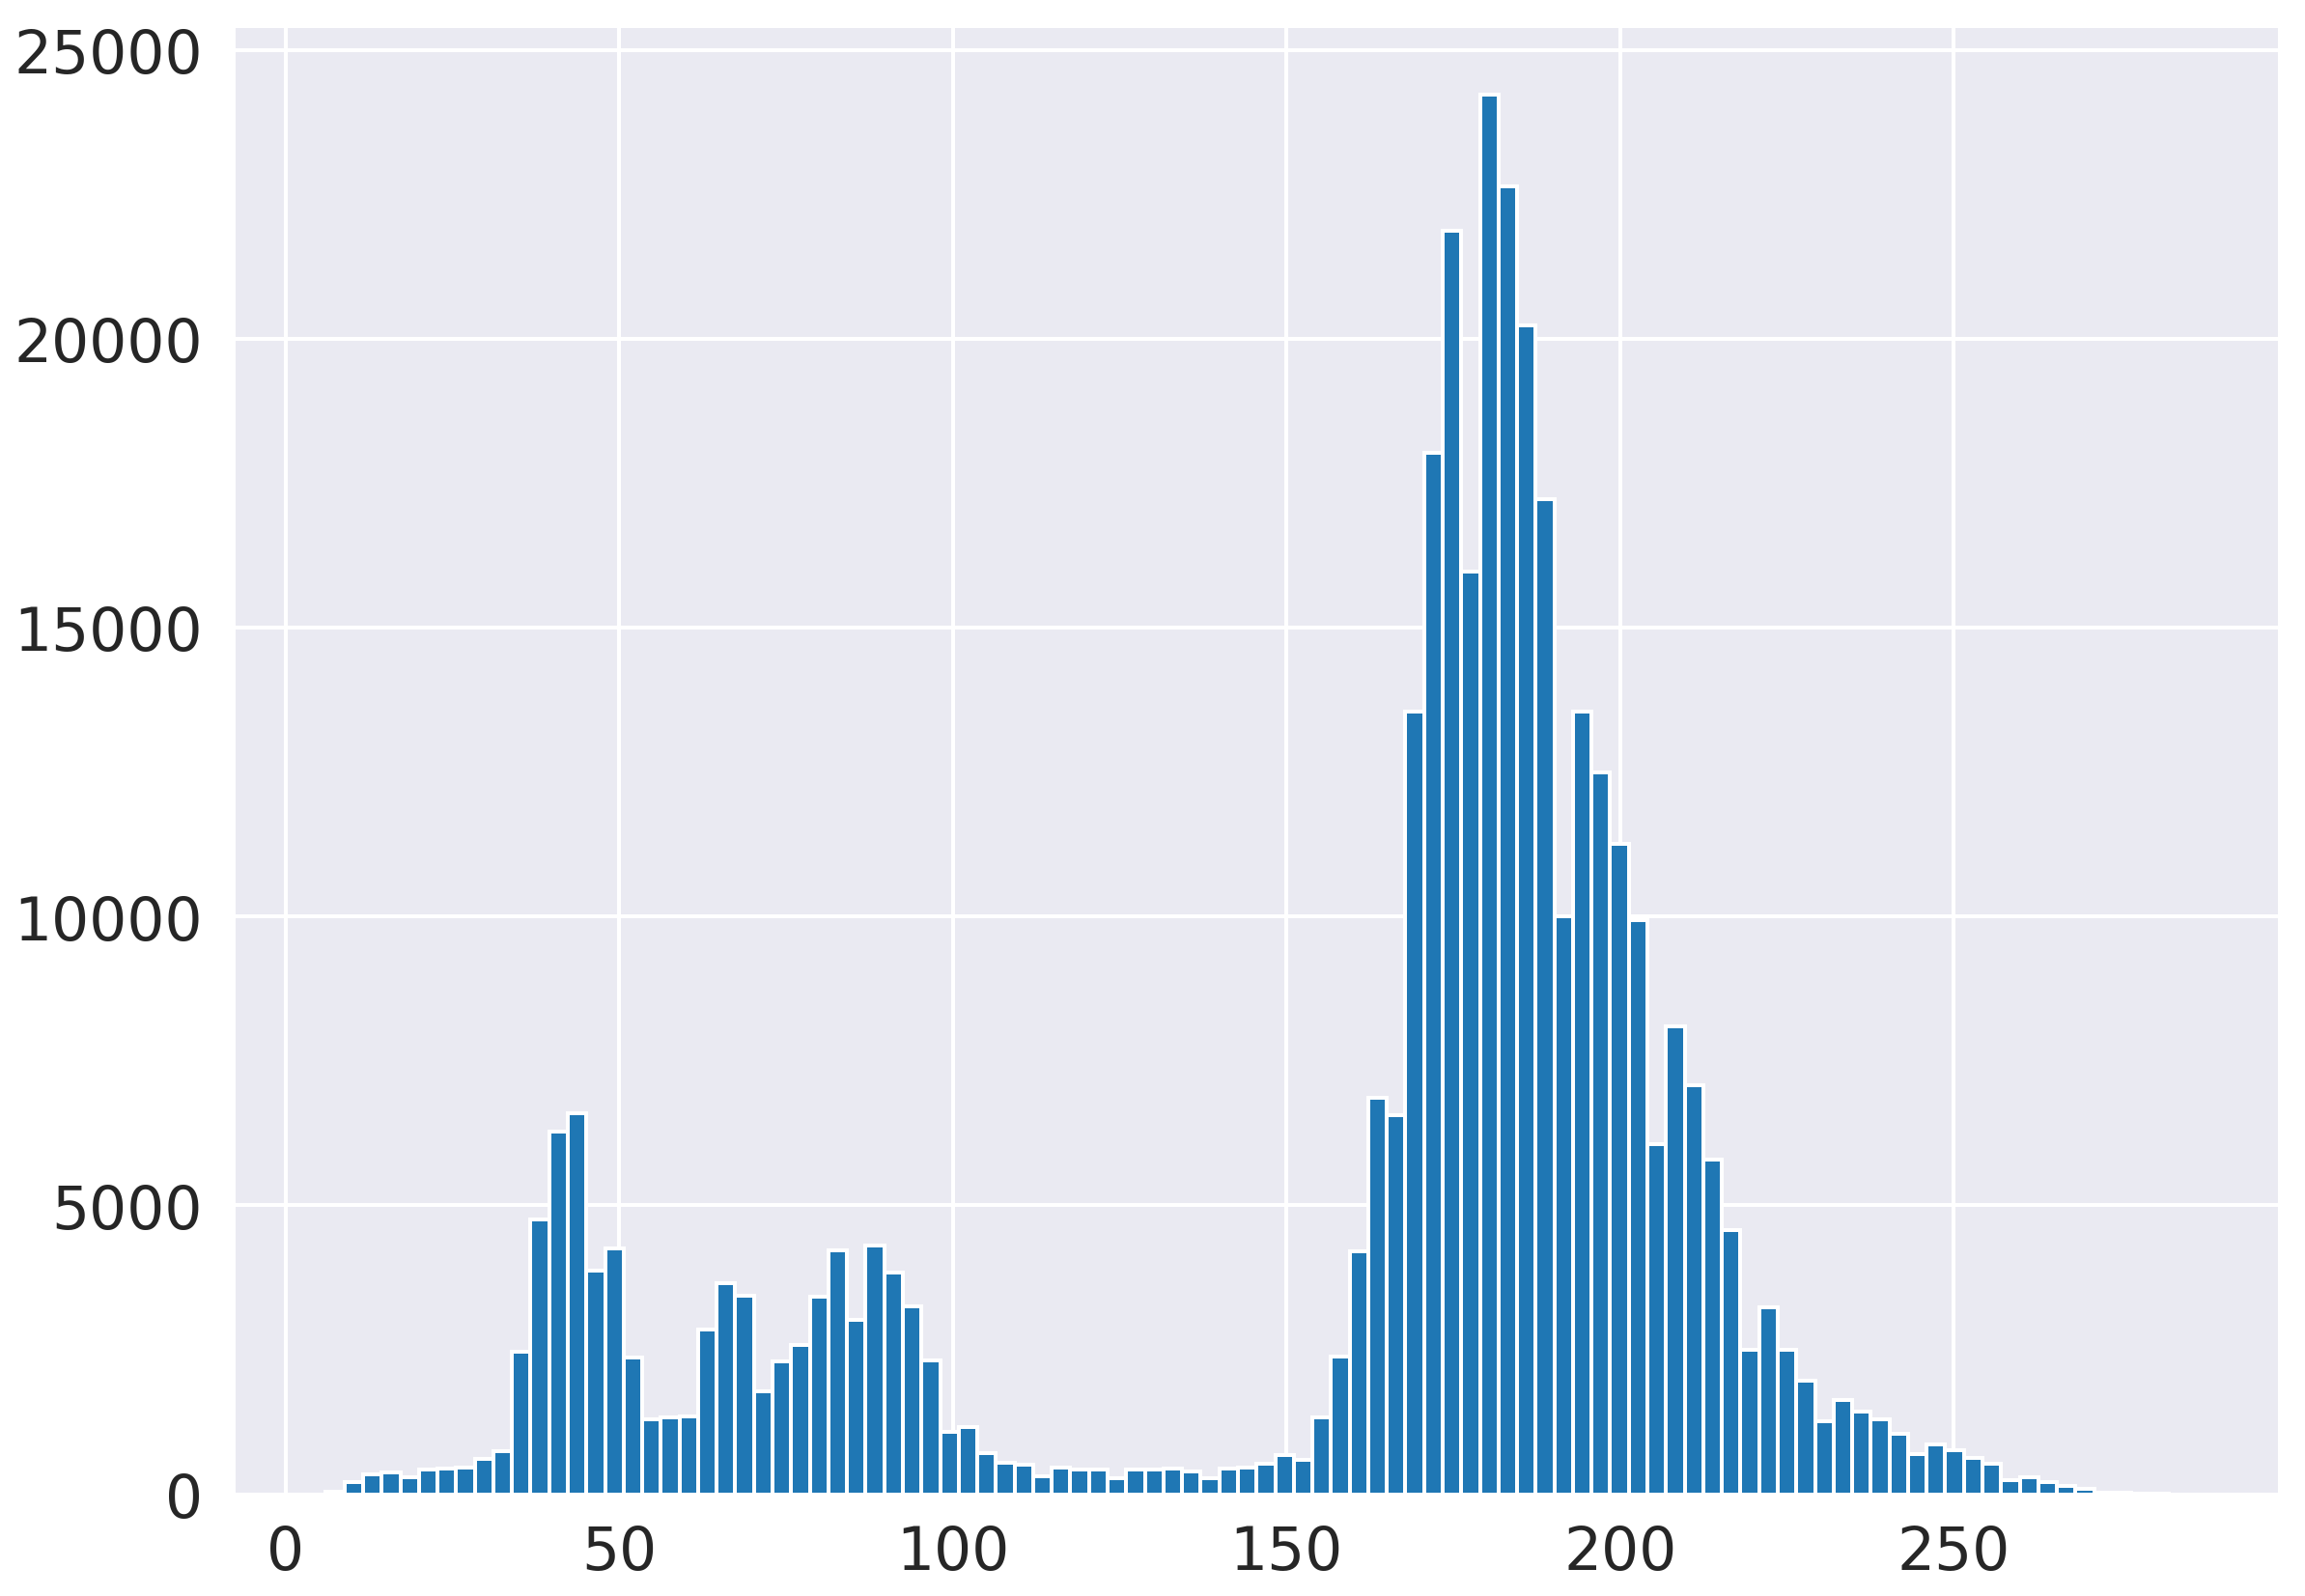

In [10]:
plt.hist(d[newestSims[0]], 100);
#plt.xlim((0, 250))

In [40]:
sqlWhere = 'filter = "i"'
for i in [newestSims[0]]:
    print(i)
    if i+' ' not in d.keys():
        runName = newestSimsPath+i
        myBundles = {}
        try:
            opsdb = db.OpsimDatabase(runName+'.db')
        except:
            continue
        slicer = slicers.HealpixSlicer(
            lonCol='fieldRA', latCol='fieldDec', nside=nside
            )
        dustMap = maps.DustMap(interp=False, nside=nside)
        metric = AverageVisitsMetric(depthlim=24.5, maps=['DustMap'])
        myBundles['metric'] = metricBundles.MetricBundle(
                                            metric,
                                            slicer,
                                            constraint=sqlWhere,
                                            runName=newestSimsPath+i,
                                            stackerList=[])

        bgroup = metricBundles.MetricBundleGroup(myBundles, opsdb,
                                                 outDir=outDir,
                                                 resultsDb=resultsDb)
        bgroup.runAll()
        mbund = myBundles['metric']
        d[i+'new'] = mbund.metricValues.data[np.logical_and(mbund.metricValues>0, mbund.metricValues.mask==False)]

altroll_mod2_sdf_0.20_v1.3_10yrs
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Querying database SummaryAllProps with constraint filter = "i" for columns ['fieldRA', 'fiveSigmaDepth', 'fieldId', 'fieldDec']
Found 460841 visits
Running:  ['metric']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


(0, 250)

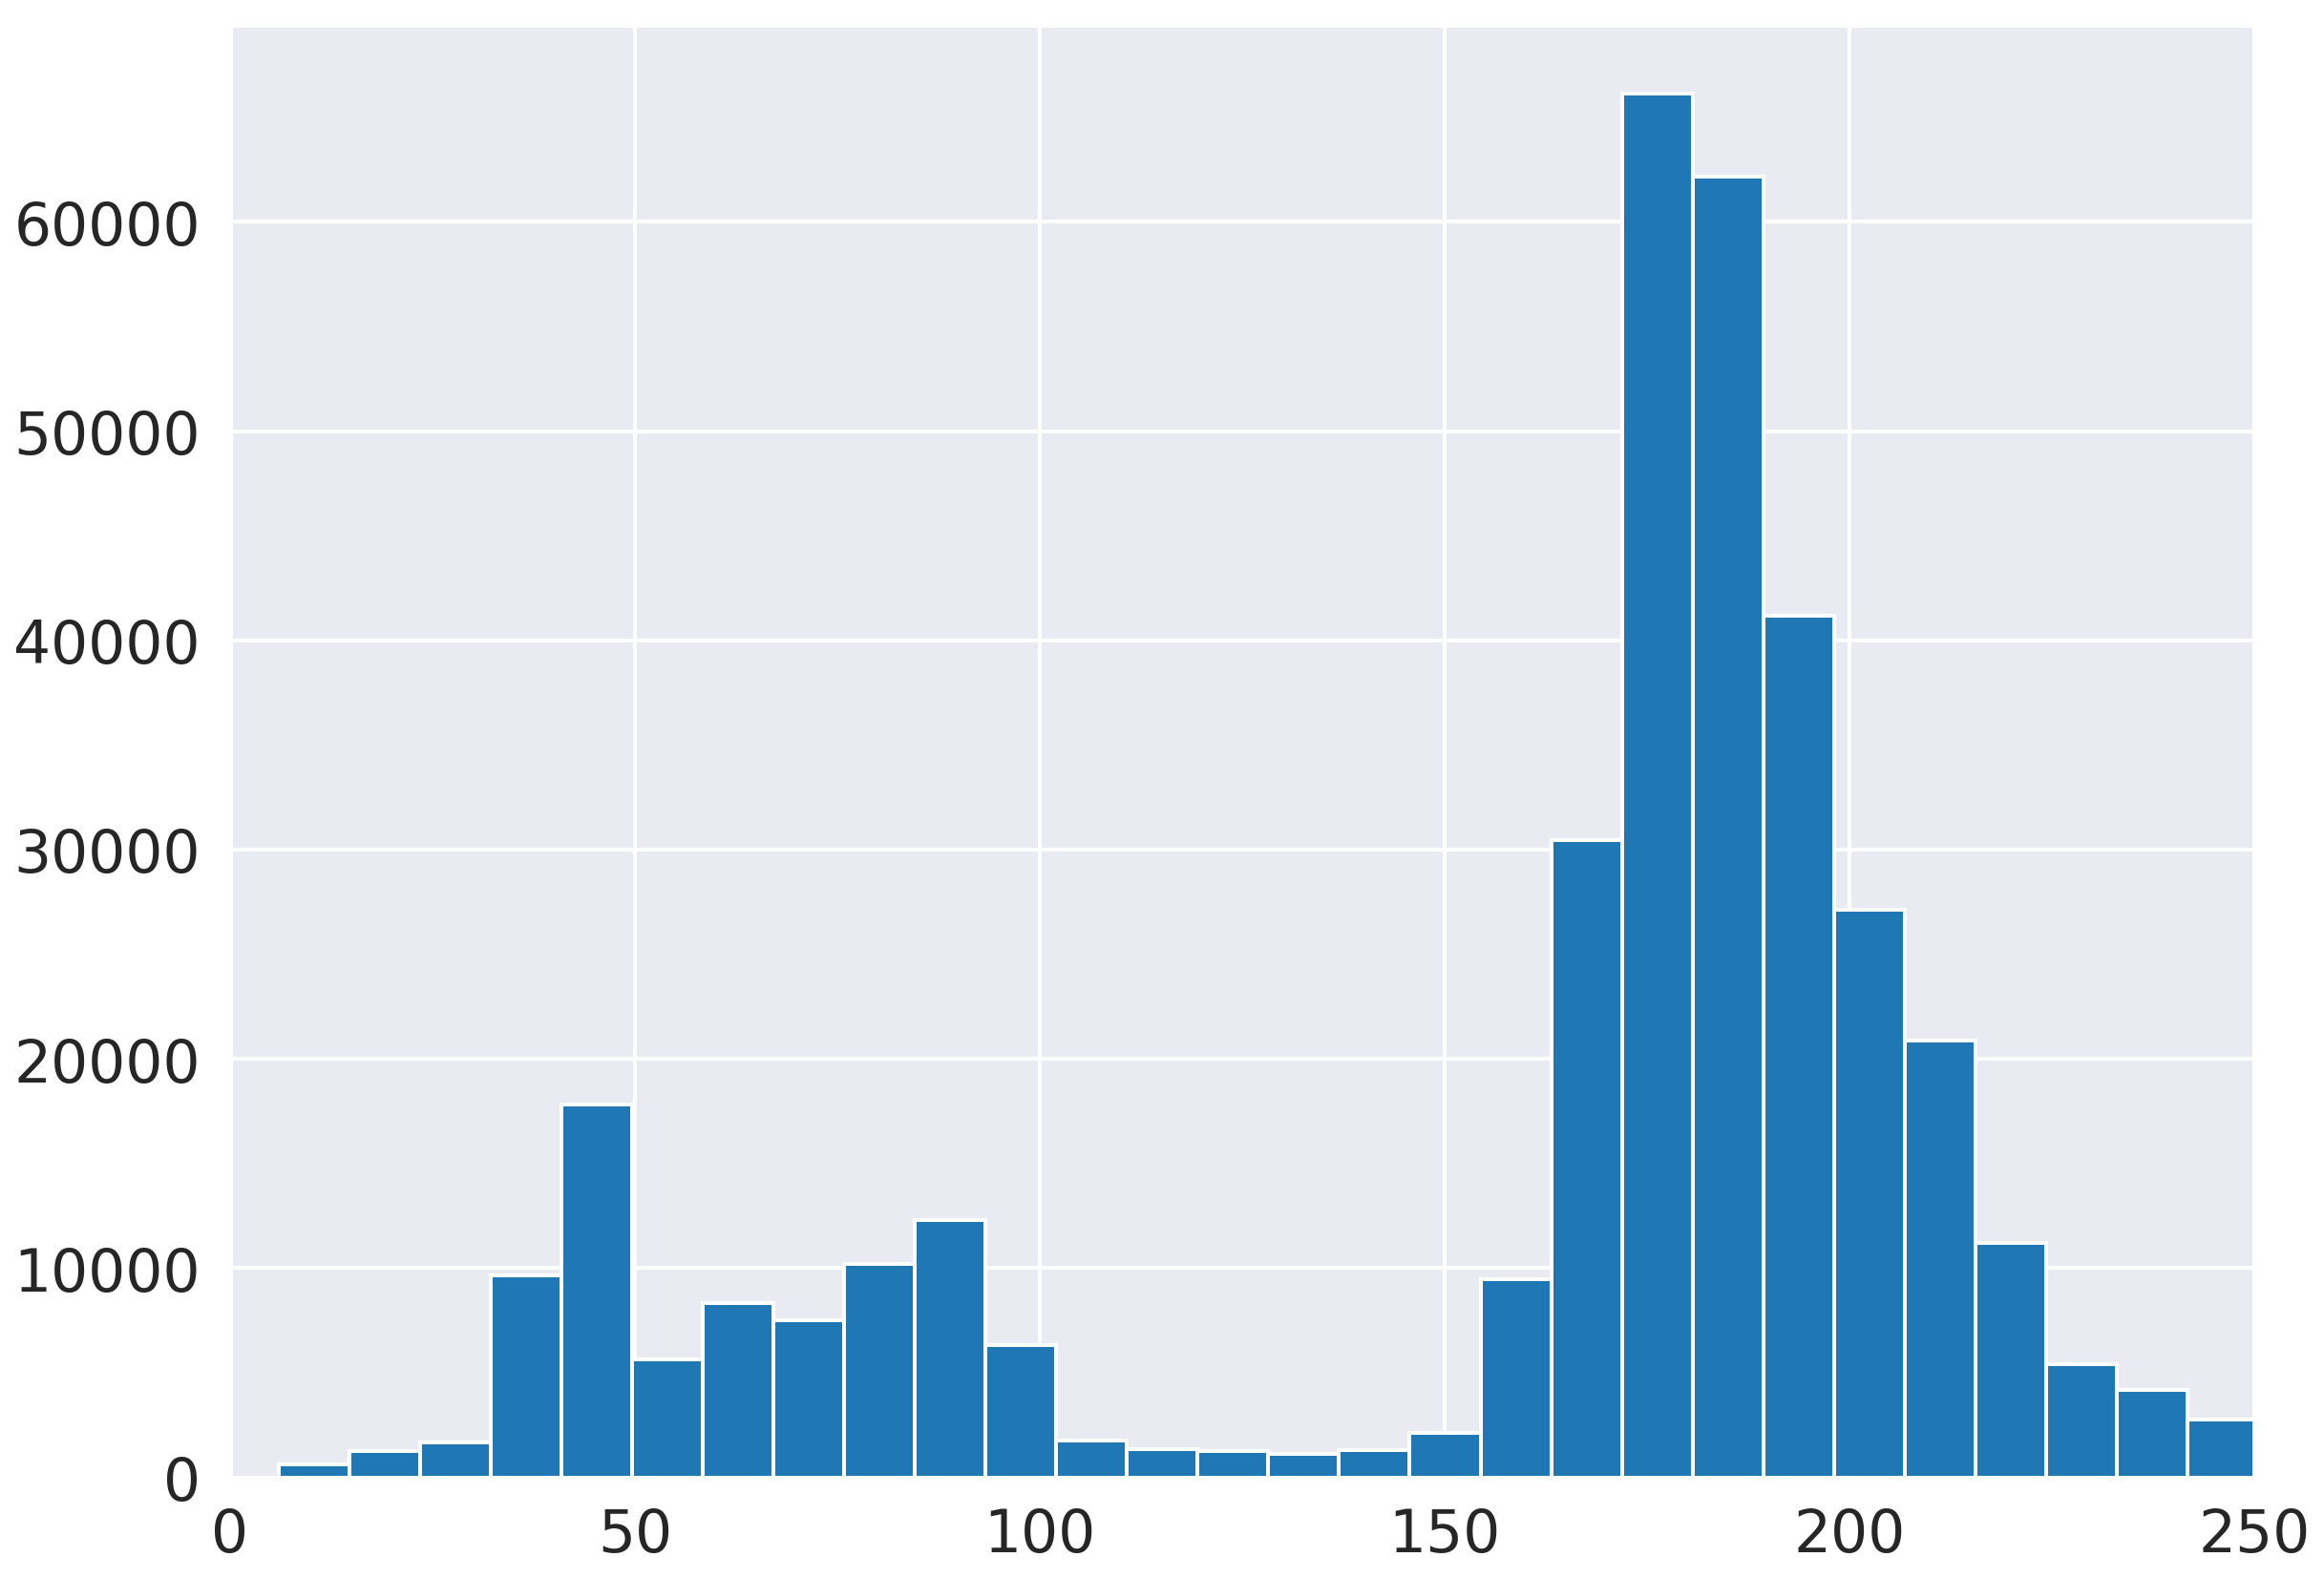

In [41]:
plt.hist(d[newestSims[0]+'new'], 1000)
plt.xlim((0, 250))

In [13]:
mbund.metric.badval

-666

In [15]:
sum((mbund.metricValues.mask==False) == True)

70162